<a href="https://colab.research.google.com/github/Suryaprabha19/ADHD/blob/main/Adhd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv("/content/adhdata.csv")
df.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T7,T8,P7,P8,Fz,Cz,Pz,Class,ID
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,...,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,ADHD,v10p
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,...,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,ADHD,v10p
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,...,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,ADHD,v10p
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,...,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,ADHD,v10p
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,...,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,ADHD,v10p


In [ ]:
df.shape

(2166383, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166383 entries, 0 to 2166382
Data columns (total 21 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Fp1     float64
 1   Fp2     float64
 2   F3      float64
 3   F4      float64
 4   C3      float64
 5   C4      float64
 6   P3      float64
 7   P4      float64
 8   O1      float64
 9   O2      float64
 10  F7      float64
 11  F8      float64
 12  T7      float64
 13  T8      float64
 14  P7      float64
 15  P8      float64
 16  Fz      float64
 17  Cz      float64
 18  Pz      float64
 19  Class   object 
 20  ID      object 
dtypes: float64(19), object(2)
memory usage: 347.1+ MB


Text(0.5, 1.0, 'Class Distribution')

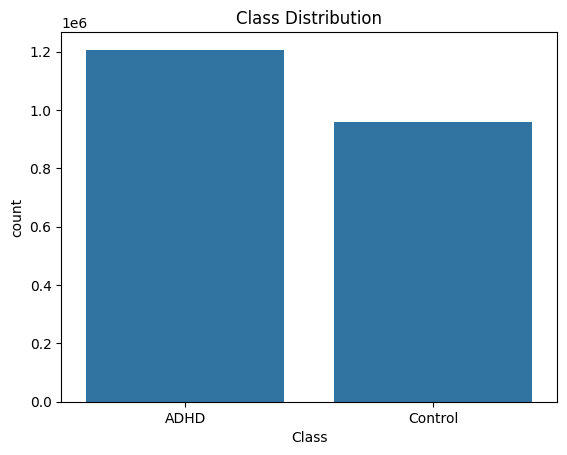

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")

In [ ]:
df['Class'] = LabelEncoder().fit_transform(df['Class'])  # ADHD -> 1, Control -> 0
X = df.drop(['Class', 'ID'], axis=1).values
y = df['Class'].values

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
print("X test shape",X_train.shape)
print("X test shape",X_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

X test shape (1733106, 19)
X test shape (433277, 19)
y train shape (1733106,)
y test shape (433277,)


In [ ]:
X_train_cnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_cnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print("X_train shape",X_train_cnn.shape)
print("X_test shape",X_test_cnn.shape)

X_train shape (1733106, 1, 19)
X_test shape (433277, 1, 19)


In [ ]:
# One-hot encode targets
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 64)          │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,570 (21.76 KB)

 Trainable params: 5,570 (21.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_cnn, y_train_cat, epochs=15, batch_size=32, validation_split=0.2, verbose=1)
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nCNN Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Epoch 1/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 141s 3ms/step - accuracy: 0.6879 - loss: 0.5982 - val_accuracy: 0.7407 - val_loss: 0.5491
Epoch 2/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 137s 3ms/step - accuracy: 0.7249 - loss: 0.5588 - val_accuracy: 0.7385 - val_loss: 0.5507
Epoch 3/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 143s 3ms/step - accuracy: 0.7263 - loss: 0.5564 - val_accuracy: 0.7395 - val_loss: 0.5467
Epoch 4/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 141s 3ms/step - accuracy: 0.7274 - loss: 0.5553 - val_accuracy: 0.7400 - val_loss: 0.5467
Epoch 5/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 162s 4ms/step - accuracy: 0.7283 - loss: 0.5542 - val_accuracy: 0.7419 - val_loss: 0.5449
Epoch 6/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.7274 - loss: 0.5543 - val_accuracy: 0.7447 - val_loss: 0.5422
Epoch 7/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.7289 - loss: 0.5533 - val_accuracy: 0.7420 - val_loss: 0.5436
Epoch 8/15
43328/43328 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - ac


Confusion Matrix:



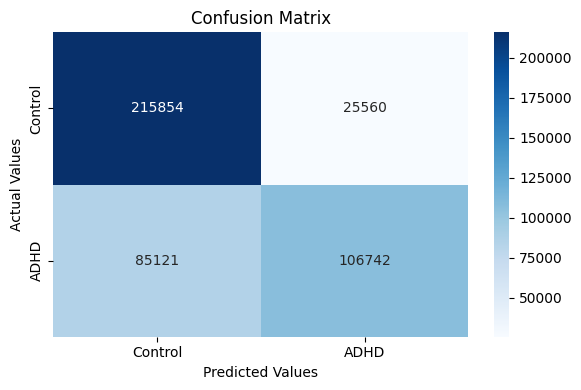

In [ ]:
print("\nConfusion Matrix:\n")
class_names = ['Control', 'ADHD']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80    241414
           1       0.79      0.61      0.69    191863

    accuracy                           0.75    433277
   macro avg       0.76      0.74      0.74    433277
weighted avg       0.76      0.75      0.75    433277



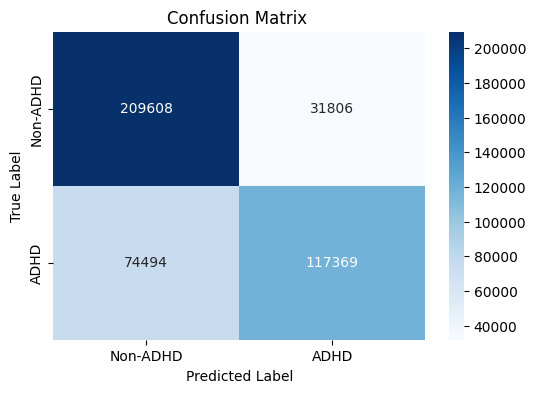

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-ADHD", "ADHD"], yticklabels=["Non-ADHD", "ADHD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()

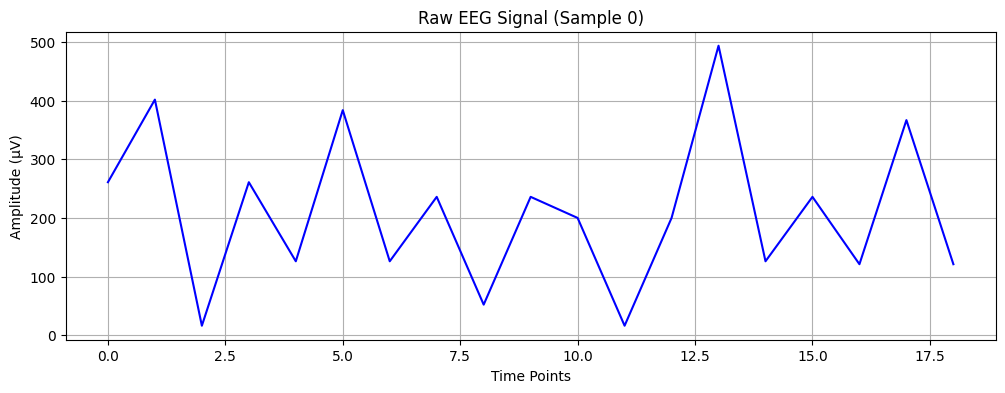

In [ ]:
# Example: Plot EEG for one sample (row), one channel (feature)
plt.figure(figsize=(12, 4))
plt.plot(X[0], color='blue')
plt.title("Raw EEG Signal (Sample 0)")
plt.xlabel("Time Points")
plt.ylabel("Amplitude (µV)")
plt.grid(True)
plt.show()

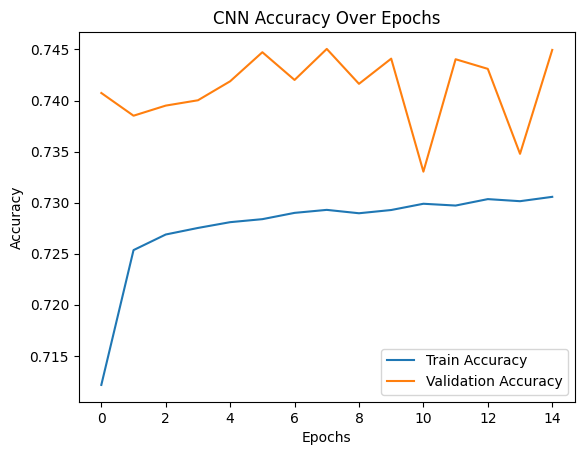

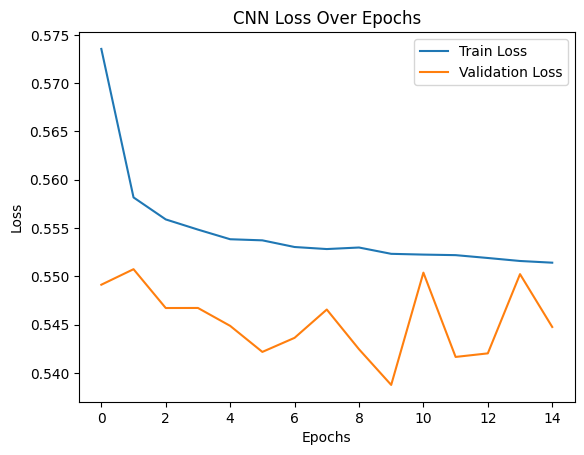

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()